# Visualization

In [1]:
import pandas as pd

df = pd.read_csv('df3.csv')

df.target = pd.Series([0 if i =='x0' else 1 for i in df.target])

for i in range(2, 16):
    df.iloc[:,i] = df.iloc[:,i].astype('category')
    
df.Eyoa = df.Eyoa.astype('int64')
df = df.drop(['Edx1'], axis=1)
df = df[df.Eer_mode!=0]

In [2]:
df.Eprovider = df.Eprovider.cat.remove_unused_categories()
df['Sex'] = ['Male' if i==1 else 'Female' for i in df.Esex]
df['Length of Stays'] = ['Short Stay' if i==0 else 'Long Stay' for i in df.target]
df['Provider'] = df.Eprovider.cat.rename_categories(['Newport',
'St. Joseph Health Services of RI',
'Memorial',
'Miriam',
'Rhode Island Hospital',
'Roger Williams',                                               
'Westerly',
'Landmark Medical Center',
'Butler',
])
df['State'] = df['Ept_state']
df['Age'] = df['Eage']
df['Ethnic'] = ['Hispanic' if i==1 else 'Not Hispanic' for i in df['Eethnic']]

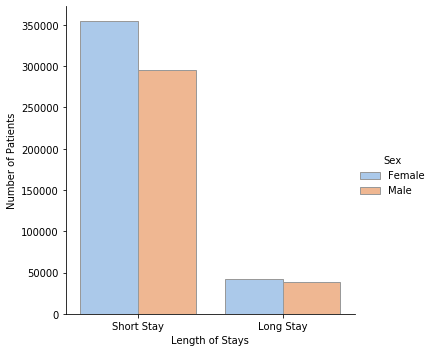

In [3]:
import seaborn as sns

ax = sns.catplot(x="Length of Stays", hue="Sex", kind="count", palette="pastel",
             edgecolor=".6",
            data=df)
ax.set(ylabel='Number of Patients')
ax.savefig('viz1.png',dpi=300,bbox_inches='tight')

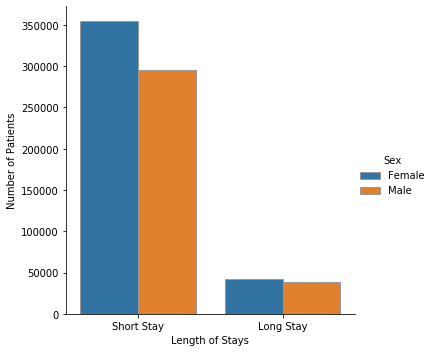

In [14]:
import seaborn as sns

ax = sns.catplot(x="Length of Stays", hue="Sex", kind="count",
             edgecolor=".6",
            data=df)
ax.set(ylabel='Number of Patients')
ax.savefig('viz1.png',dpi=300,bbox_inches='tight')

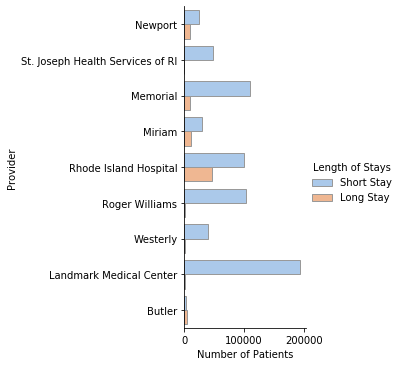

In [15]:
ax = sns.catplot(y="Provider", hue="Length of Stays", kind="count", palette="pastel",
             edgecolor=".6",
            data=df);
ax.set(xlabel='Number of Patients')
ax.savefig('viz2.png',dpi=300,bbox_inches='tight')

In [16]:
df['State'] = ['RI' if i=='RI' else 'Others' for i in df.Ept_state]

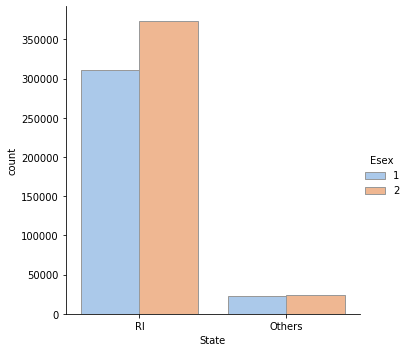

In [17]:
sns.catplot(x="State", hue="Esex", kind="count", palette="pastel",
             edgecolor=".6",
            data=df);

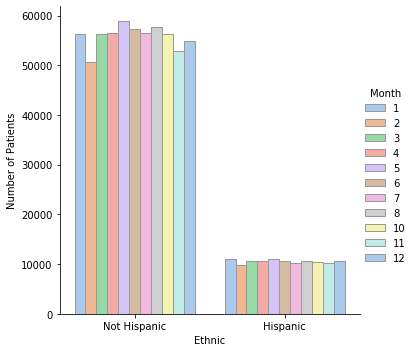

In [18]:
df['Month'] = df['Emoa']
ax = sns.catplot(x="Ethnic", hue="Month", kind="count", palette="pastel",
             edgecolor=".6",
            data=df);
ax.set(ylabel='Number of Patients')
ax.savefig('viz3.png',dpi=300,bbox_inches='tight')

In [ ]:
df['Month'] = df['Emoa']
ax = sns.catplot(x="Month", hue="Length of Stays", kind="count", palette="pastel",
             edgecolor=".6",
            data=df);
ax.set(ylabel='Number of Patients')
ax.savefig('viz3.png',dpi=300,bbox_inches='tight')

In [132]:
df['Ethnic'] = ['Hispanic' if i==1 else 'Not Hispanic' for i in df['Eethnic']]

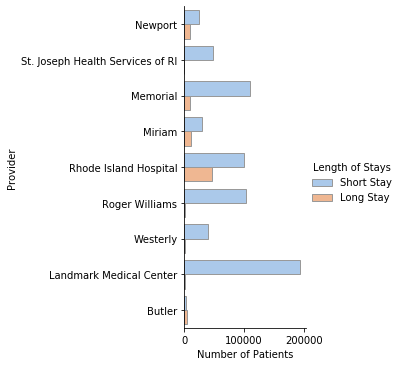

In [78]:
df['Length of Stays'] = df['target']
ax = sns.catplot(y="Provider", hue="Length of Stays", kind="count", palette="pastel",
             edgecolor=".6",
            data=df)
ax.set(xlabel='Number of Patients')

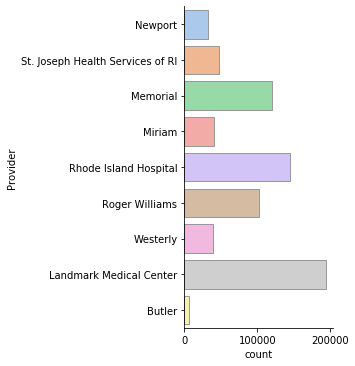

In [139]:
sns.catplot(y="Provider", kind="count", palette="pastel",
             edgecolor=".6",
            data=df);

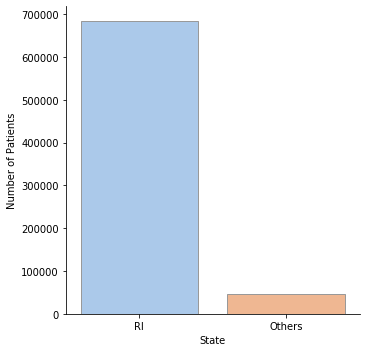

In [123]:
df['State2'] = ['RI' if i=='RI' else 'Others' for i in df['State']]
ax = sns.catplot(x="State2", kind="count", palette="pastel",
             edgecolor=".6",
            data=df)
ax.set(xlabel='State',ylabel='Number of Patients')
ax.savefig('viz5.png',dpi=300,bbox_inches='tight')

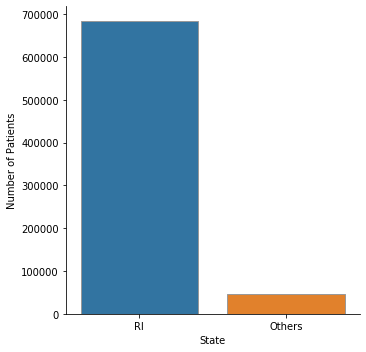

In [137]:
df['State2'] = ['RI' if i=='RI' else 'Others' for i in df['State']]
ax = sns.catplot(x="State2", kind="count",
             edgecolor=".6",
            data=df)
ax.set(xlabel='State',ylabel='Number of Patients')
ax.savefig('viz5.png',dpi=300,bbox_inches='tight')

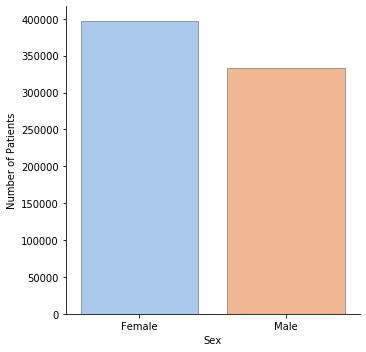

In [125]:
ax = sns.catplot(x="Sex", kind="count", palette="pastel",
             edgecolor=".6",
            data=df)
ax.set(xlabel='Sex',ylabel='Number of Patients')
ax.savefig('viz6.png',dpi=300,bbox_inches='tight')

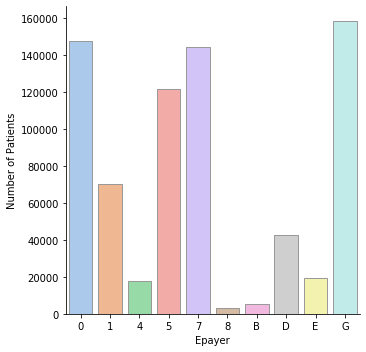

In [129]:
ax = sns.catplot(x="Epayer", kind="count", palette="pastel",
             edgecolor=".6",
            data=df)
ax.set(xlabel='Epayer',ylabel='Number of Patients')
ax.savefig('viz6.png',dpi=300,bbox_inches='tight')

In [127]:
df.columns

Index(['target', 'Eage', 'Esex', 'Eprovider', 'Emoa', 'Eyoa', 'Eadmtype',
       'Easource', 'Epayer', 'Epay_ub92', 'Ept_state', 'Ediag_adm', 'Ecampus',
       'Eer_mode', 'Erace', 'Eethnic', 'Sex', 'Length of Stays', 'Provider',
       'Month', 'State', 'Age', 'State2'],
      dtype='object')

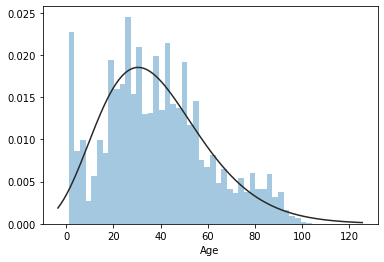

In [117]:
from scipy import stats
ax = sns.distplot(df['Age'], kde=False, fit=stats.gamma, label=df.Esex)
ax.figure.savefig('viz4.png',dpi=300,bbox_inches='tight')

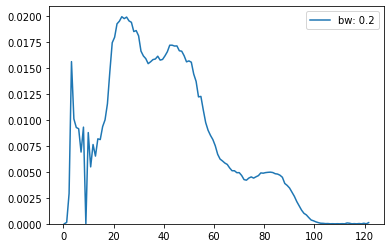

In [29]:
sns.kdeplot(df.Eage, bw=.2, label="bw: 0.2")

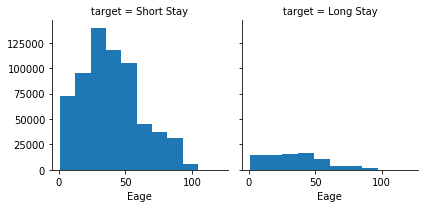

In [38]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col="target", margin_titles=True)
g.map(plt.hist, "Eage")

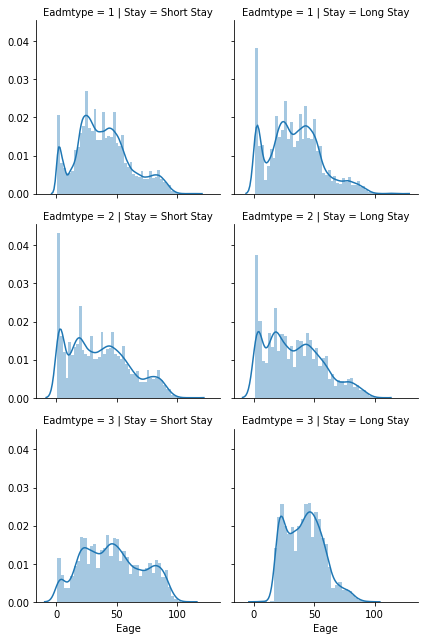

In [11]:
df['Stay'] = df['Length of Stays']
g = sns.FacetGrid(df, col="Stay", row = 'Eadmtype')
g = g.map(sns.distplot, "Eage")
g.savefig('viz5.png',dpi=300,bbox_inches='tight')

In [5]:
df.columns

Index(['target', 'Eage', 'Esex', 'Eprovider', 'Emoa', 'Eyoa', 'Eadmtype',
       'Easource', 'Epayer', 'Epay_ub92', 'Ept_state', 'Ediag_adm', 'Ecampus',
       'Eer_mode', 'Erace', 'Eethnic', 'Sex', 'Length of Stays', 'Provider',
       'State', 'Age', 'Ethnic'],
      dtype='object')

In [7]:
df.Eadmtype.value_counts()

1    641515
2     61681
3     26796
Name: Eadmtype, dtype: int64

In [9]:
df.shape

(729992, 22)